# INFO204 Lab 4 - Performance Evaluation

For this lab we are going to experiment with three important skills in data science: ROC and AUC calculation, cross validation, and performance data visualization. 

First we import the "breast cancer" dataset as we did in Lab 3.

## Part 1. ROC curves and AUC

In [1]:
import numpy as np
from sklearn import datasets
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target
n_samples, n_features = X.shape

For a start, let's shuffle the dataset and use the first half of the dataset for training, the 2nd for testing:

In [2]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)
tr_rows=range(n_samples/2)
te_rows=range(n_samples/2,n_samples)

Now let's generate evaluate the performance of an SVC classifier using the ROC curve as the tool. Note because of the need for thresholding so as to calculate TPRs and FPRs, probabilistic prediction is carried out using the ["predict_proba()" function](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict_proba). ScikitLearn's roc_curve function then produces the arrays of FPR and TPR, from which the AUC can be calculated and the ROC curve plotted - see below. 

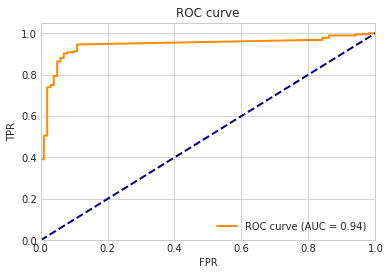

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid") 
import pandas as pd
%matplotlib inline

clf = SVC(kernel='rbf', probability=True)

probas_ = clf.fit(X[tr_rows], y[tr_rows]).predict_proba(X[te_rows])
# Compute ROC curve and area the curve for the "1" class
fpr, tpr, thresholds = roc_curve(y[te_rows], probas_[:, 1])
roc_auc = auc(fpr, tpr)     # calculate AUC

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower right");   # ';' used to suppress text output
plt.show() 

**Task 1.** Based on the example code given above, write a "plot_roc_curve()" function that plots a ROC cuve given the FPR and TPR arrays, and reports the AUC value within the plot. Test it. 

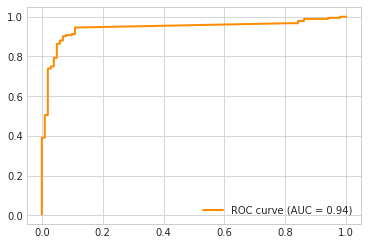

In [4]:
# your code for Task 1
def plot_roc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)  # calculate auc from params
    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)  # plot and label
    plt.legend(loc='lower right')  # report auc
    plt.show()
    

plot_roc_curve(fpr, tpr) # test

# looks similar to our previous result!

In [18]:
print(fpr)
print(tpr)  # observe the tpr increases more rapidly than fpr, which gives the recognisable shape
print(fpr[len(fpr)-1] + tpr[len(tpr)-1])

[0.         0.01801802 0.01801802 0.01801802 0.01801802 0.01801802
 0.01801802 0.01801802 0.02702703 0.03603604 0.06306306 0.06306306
 0.09009009 0.09009009 0.0990991  0.10810811 0.12612613 0.13513514
 0.13513514 0.14414414 0.14414414 0.15315315 0.16216216 0.17117117
 0.17117117 0.17117117 0.18918919 0.1981982  0.22522523 0.24324324
 0.26126126 0.27027027 0.2972973  0.31531532 0.33333333 0.34234234
 0.35135135 0.36936937 0.37837838 0.40540541 0.42342342 0.43243243
 0.45045045 0.45045045 0.47747748 0.56756757 0.66666667 0.93693694
 1.        ]
[0.50289017 0.68208092 0.69364162 0.71098266 0.72254335 0.76878613
 0.77456647 0.80346821 0.8150289  0.83236994 0.83236994 0.84971098
 0.86127168 0.87861272 0.88439306 0.89595376 0.90751445 0.90751445
 0.92485549 0.93063584 0.94219653 0.94219653 0.95375723 0.95953757
 0.96531792 0.97687861 0.97687861 0.98265896 0.98265896 0.98265896
 0.98843931 0.98843931 0.98843931 0.98843931 0.98843931 0.99421965
 0.99421965 0.99421965 0.99421965 0.99421965 0.99

**Task 2.** Use a k-nearest neighbour classifier, generate a ROC curve and calculate AUC. 

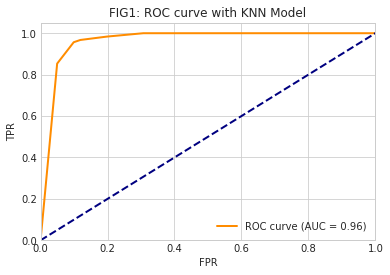

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# your code for Task 2

model = KNeighborsClassifier(n_neighbors=5).fit(X[tr_rows], y[tr_rows])  # create and train model 
probas_ =  model.predict_proba(X[te_rows])  # find associated probablities

# Compute ROC curve and area the curve for the "1" class
fpr, tpr, thresholds = roc_curve(y[te_rows], probas_[:, 1])
roc_auc = auc(fpr, tpr)     # calculate AUC

# plot results
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('FIG1: ROC curve with KNN Model')
plt.legend(loc="lower right");   # ';' used to suppress text output
plt.show()

**Task 3a.** Model comparison. Now generate the ROCs for k-NN classifiers with k values given in the ks list - see below. 

*Tips:* Generate the ROC curves first using the same color as before; then think about using different colors for different models. Use different keys too. 

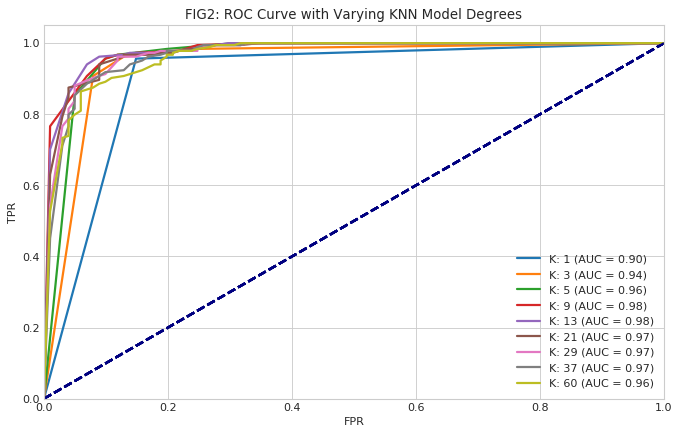

In [7]:
# Complete the code for Task 3a
colors=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']     # a few colors for different models' ROC
ks = [1, 3, 5, 9, 13, 21, 29, 37, 60]
color_id = 0

# lets make the plot able to clearly display all ROCs and the keys
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6.18034), dpi=80, facecolor='w', edgecolor='k') 

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k).fit(X[tr_rows], y[tr_rows])  # create and train model with k
    probas_ =  model.predict_proba(X[te_rows])  # find associated probablities for this k

    # Compute ROC curve and area the curve for the "1" class
    fpr, tpr, thresholds = roc_curve(y[te_rows], probas_[:, 1])
    roc_auc = auc(fpr, tpr)     # calculate AUC

    # plot results
    plt.plot(fpr, tpr, color=colors[color_id],
             lw=2, label='K: %i (AUC = %0.2f)' % (k, roc_auc))  # plot using colors array to differentiate this k
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    color_id += 1
plt.title('FIG2: ROC Curve with Varying KNN Model Degrees')  # alter title
plt.legend(loc="lower right");   # ';' used to suppress text output
plt.show()

>- It seems that the quality of the model increases with k until k=21 (the bias/variance sweet spot) - and then begins to decrease with underfitting.

**Task 3b.** Do the same as 3a, but generate the ROCs for k-NN classifiers with k values given in the ks list by testing on the *training* rows. Observe the differences. 

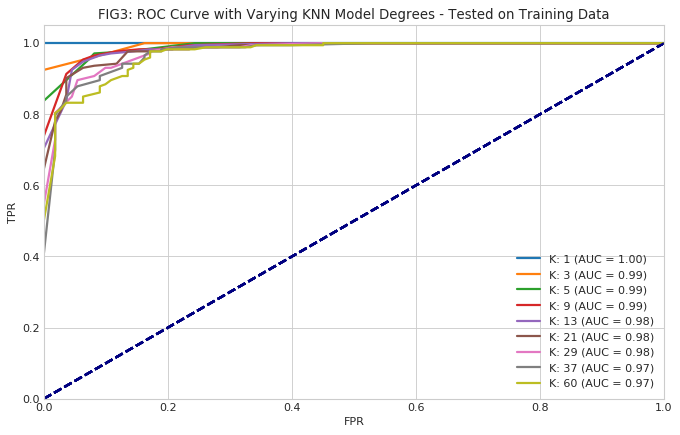

In [8]:
color_id = 0 
figure(num=None, figsize=(10, 6.18034), dpi=80, facecolor='w', edgecolor='k') # lets make the plot able to clearly display all ROCs

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k).fit(X[tr_rows], y[tr_rows])  # create and train model with k
    probas_ =  model.predict_proba(X[tr_rows])  # find associated probablities for this k with TRAINING VALUES

    # Compute ROC curve and area the curve for the "1" class
    fpr, tpr, thresholds = roc_curve(y[tr_rows], probas_[:, 1])  #this time use to TRAINING VALUES
    roc_auc = auc(fpr, tpr)     # calculate AUC

    # plot results
    plt.plot(fpr, tpr, color=colors[color_id],
             lw=2, label='K: %i (AUC = %0.2f)' % (k, roc_auc))  # plot using colors array to differentiate this k
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    color_id += 1
plt.title('FIG3: ROC Curve with Varying KNN Model Degrees - Tested on Training Data')  #alter title
plt.legend(loc="lower right");   # ';' used to suppress text output
plt.show()

### Your comments: 
>- As expected, models perform close to perfectly on data they've already seen before. For example in FIG3, when the model is looking for 1 neighbour(k=1), it always locates the same point of the same distribution.
>- Thusly, our ROC in FIG3 implies we have a perfect model when k is low - however we know this is not the case. 
>- From lectures we know that low k usually overfits the model - a condition observable in FIG2 where the same models were tested on differernt data to what they were trained on (a more likely real life scenario).
>- Looking at those more realistic ROCs in FIG2, we could say the optimum number of neighbours for this model is k=21. Training on k=21 neighbours will give the best results in this case (with unseen data but no cross validation).

## Part 2. Cross validation

Note we are only validating the k-NN classifiers using one split. How about incorporating a proper cross validation? The following code conducts a 3-fold CV for the X,y dataset and reports the scores for the three folds:

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

clf = KNeighborsClassifier(n_neighbors=5)
cross_val_score(clf, X, y)

array([0.92105263, 0.9       , 0.94179894])

We are now bettr off with 3 scores instead of one, but it is perhaps still not so statistically informative. What is often done in practice is to carry out cross-validation multiple times, so as to ensure performance comparison can be made more robustly. The following code employs KFold to generate randomized 3-fold cross validation three times: 

In [10]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, shuffle=True, random_state=None)      # asks for a 3-fold CV with randomization
perflist = []   # an empty list to collect all CV scores
for k in range(3):   # do it for 3 times
    clf = KNeighborsClassifier(n_neighbors=5)
    perflist.append(cross_val_score(clf, X, y, cv = kf))

In [11]:
perflist

[array([0.93157895, 0.95263158, 0.92063492]),
 array([0.94210526, 0.92105263, 0.93121693]),
 array([0.95789474, 0.93157895, 0.91005291])]

You see perflist is actually a list of arrays, which can be converted into an array, and flattened, before being used by Matplotlib's boxplot() for visualization:

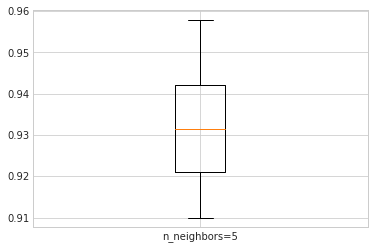

In [12]:
plt.boxplot(np.array(perflist).ravel(), labels=['n_neighbors=5']);

This actually shows a "box and whiskers" plot for a list/array of data, with the median shown by the red line, the lower and upper box lines indicating the 25% and 75% quantiles, and the whiskers indicating the range of the data. The boxplot serves a useful tool to visualize the performance envelop of models. 

**Task 4.** Now, similar to the process given above, carry out a **10-fold** KFold CV for **10** times and produce the boxplots for n_neighbors=1, 13, 37. Compare the boxplots and recommend a setting of "n_neighbors". 

In [13]:
import seaborn as sns # for some fun lets try out a beautiful seaborn plot on this task
import pandas as pd  # this took much longer than expected as the DataFrame needs to be in a special format!

In [19]:
#define kf as 10 splits this time
kf=KFold(n_splits=10, shuffle=True, random_state=None) # generator of indexes showing where to split the data
N1 = []   # empty lists to collect all CV scores
N13 = []
N37 = []
data = np.zeros(shape=(1,2))  # a reference np array to define the data shape and to have something to append to

#  each N value on data split 10 different ways, 10 times
for k in range(10):   
    clf = KNeighborsClassifier(n_neighbors=1)
    N1.append(cross_val_score(clf, X, y, cv = kf))
        
for k in range(10):   
    clf = KNeighborsClassifier(n_neighbors=13)
    N13.append(cross_val_score(clf, X, y, cv = kf))

for k in range(10):   
    clf = KNeighborsClassifier(n_neighbors=37)
    N37.append(cross_val_score(clf, X, y, cv = kf))

# Now lets practice massaging and arranging the scores we got into a 'dataset-like' np array
insert = np.c_[np.full(shape=(100,1), fill_value=1), np.array(N1).reshape(100,1)]
data = np.r_[data, insert]

insert = np.c_[np.full(shape=(100,1), fill_value=13), np.array(N13).reshape(100,1)]
data = np.r_[data, insert]

insert = np.c_[np.full(shape=(100,1), fill_value=37), np.array(N37).reshape(100,1)]
data = np.r_[data, insert]

# lets remove the reference row and check the shape
data = np.delete(data, 0, 0)
print(data.shape)

(300, 2)


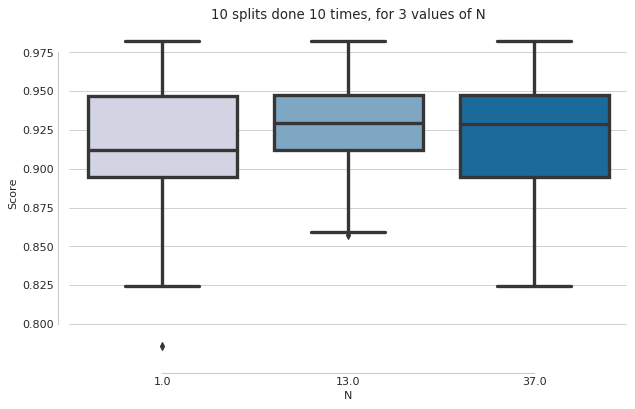

In [15]:
# finally lets make a pd dataframe from that data and a create a boxplot
df = pd.DataFrame(data=data, columns=['N', 'Score'])

figure(num=None, figsize=(9, 5.56231), dpi=80, facecolor='w', edgecolor='k') # determine a nice size
sns.set_style("whitegrid") 
ax = sns.boxplot(x='N', y='Score', data=df, palette="PuBu", linewidth=3).set_title("10 splits done 10 times, for 3 values of N")
sns.despine(offset=10, trim=True)

### Your comments: 
>- Here we can see the that n=13 performs the best. The model is reasonably consistent over many iterations looking at its inter-quartile range, and even in its worst 25% of performances doesn't fall too far from AUC=0.9. 
>- In comparison, n=1 has a range of almost 0.2 indicating it is not very consistent - but 75% of the time performs okay.
>- Lastly, n=37 is more consitent than k=1, however never exceeds 0.98 or thereabouts. 
>- Even though all models have varying features and consistencies - their means aren't too different. The mean for n=13 is the highest by no more than 0.01.* 

#### Conclusion
>- As hypothesised in previous tasks and lectures and demonstrated in this lab, a low n overfits the the model to the training data - so when an unseen value or set of values appear, the model is not general enough to effectively classify them.
>- Equally the opposite is true. If n is too high, the model is underfit (missing the nuances of the training data) and becomes too general to effectively classify new instances.
>- Cross validation can help us locate the bias/variance sweetspot in a way that is statistically robust.
>- Future learning: I'm learning to use plotly to interactively see the fine details between distributions like these ones.

##### *I explore some interactive plotting techniques below. A little extra in preparation for the assignment.

In [16]:
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [17]:
#Using the original N arrays as plotly (not surprisingly) requires special preparation to use
trace0 = go.Box(
    y=np.array(N1).ravel(),
    name = 'N = 1',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    ),
    
)
trace1 = go.Box(
    y=np.array(N13).ravel(),
    name = 'N = 13',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=np.array(N37).ravel(),
    name = 'N = 37',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)

#And voila, we are now able to see EXACTLY how well/poorly each model performed
data = [trace0, trace1, trace2]
iplot(data)

#### End of Lab 4